### 기본 세팅

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import platform

# 한글 폰트 설정
def set_korean_font():
    system_name = platform.system()

    if system_name == 'Windows':
        plt.rc('font', family='Malgun Gothic')
    elif system_name == 'Darwin': # Mac
        plt.rc('font', family='AppleGothic')
    else:
        plt.rc('font', family='DejaVu Sans')
set_korean_font()

# 맥 세팅
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.dpi'] = 150

%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-v0_8-whitegrid')

# [Mac 전용] 한글 폰트 및 마이너스 기호 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [195]:
# 파일 경로
charge_path = "/Users/kkkg0829/Desktop/project/data set/B0005_charge.csv"
discharge_path = "/Users/kkkg0829/Desktop/project/data set/B0005_discharge.csv"
imp_path = "/Users/kkkg0829/Desktop/project/data set/B0005_impedance.csv"

# 데이터 로드
charge = pd.read_csv(charge_path)
discharge = pd.read_csv(discharge_path)
imp = pd.read_csv(imp_path)

# 실제 사이클 = real_cycle
charge['real_cycle'] = (charge['cycle_idx'] + 1) //2
discharge['real_cycle'] = (discharge['cycle_idx'] + 1) //2
imp['real_cycle'] = (imp['cycle_idx'] + 1) //2

### Charge 데이터

In [196]:
charge

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,cycle_idx,type,ambient_temperature,start_time_raw,real_cycle
0,3.873017,-0.001201,24.655358,0.000,0.003,0.000,1,charge,24.0,[2.0080e+03 4.0000e+00 2.0000e+00 1.3000e+01 8...,1
1,3.479394,-4.030268,24.666480,-4.036,1.570,2.532,1,charge,24.0,[2.0080e+03 4.0000e+00 2.0000e+00 1.3000e+01 8...,1
2,4.000588,1.512731,24.675394,1.500,4.726,5.500,1,charge,24.0,[2.0080e+03 4.0000e+00 2.0000e+00 1.3000e+01 8...,1
3,4.012395,1.509063,24.693865,1.500,4.742,8.344,1,charge,24.0,[2.0080e+03 4.0000e+00 2.0000e+00 1.3000e+01 8...,1
4,4.019708,1.511318,24.705069,1.500,4.753,11.125,1,charge,24.0,[2.0080e+03 4.0000e+00 2.0000e+00 1.3000e+01 8...,1
...,...,...,...,...,...,...,...,...,...,...,...
541168,0.236356,-0.003484,23.372048,0.000,0.003,0.000,616,charge,24.0,[2008. 5. 28. 11. 9. ...,308
541169,0.003365,-0.001496,23.369434,0.000,0.003,2.547,616,charge,24.0,[2008. 5. 28. 11. 9. ...,308
541170,4.985137,0.000506,23.386535,0.000,5.002,5.500,616,charge,24.0,[2008. 5. 28. 11. 9. ...,308
541171,4.984720,0.000442,23.386983,-0.002,5.002,8.312,616,charge,24.0,[2008. 5. 28. 11. 9. ...,308


In [198]:
print("[Charge 데이터]")
charge.info()
print("\n결측치 개수:")
print(charge.isna().sum())

[Charge 데이터]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541173 entries, 0 to 541172
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Voltage_measured      541173 non-null  float64
 1   Current_measured      541173 non-null  float64
 2   Temperature_measured  541173 non-null  float64
 3   Current_charge        541173 non-null  float64
 4   Voltage_charge        541173 non-null  float64
 5   Time                  541173 non-null  float64
 6   cycle_idx             541173 non-null  int64  
 7   type                  541173 non-null  object 
 8   ambient_temperature   541173 non-null  float64
 9   start_time_raw        541173 non-null  object 
 10  real_cycle            541173 non-null  int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 45.4+ MB

결측치 개수:
Voltage_measured        0
Current_measured        0
Temperature_measured    0
Current_charge          0
Voltage_charge          

In [199]:
# charge 기초통계
## 전체 통계
print("\n [charge 데이터 전체 통계]")
charge[[
    "Voltage_measured",
    "Current_measured",
    "Temperature_measured",
    "Current_charge",
    "Voltage_charge",
    "Time"
]].describe()



 [charge 데이터 전체 통계]


,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time
count,541173.000000,541173.000000,541173.000000,541173.000000,541173.000000,541173.000000
mean,4.158644,0.571543,25.770628,0.566810,4.184427,5062.836059
std,0.098078,0.620454,1.643729,0.616015,1.112792,3114.798871
min,0.003365,-4.479660,23.246728,-4.468000,0.003000,0.000000
25%,4.195473,0.058024,24.438659,0.057000,4.250000,2271.610000
50%,4.205310,0.227544,25.255235,0.225000,4.332000,4982.078000
75%,4.205978,1.506508,26.819807,1.498000,4.688000,7763.219000
max,8.393141,1.531301,31.187718,1.500000,5.002000,10807.328000


(1) 충전 과정은 일관된 프로토콜(CC → CV) 로 운영되고 있으며, 전압 범위(4.19~4.21V 근처)와 충전 시간 분포가 매우 안정적임

(2) 온도 범위가 일정하며 과도한 발열이 없으므로, 실험 환경은 외부 요인 없이 안정적 → 나중에 발생하는 변화는 배터리 자체 열화에 의한 것일 가능성 ↑

(3) Current와 Voltage 설정치에 비해 실제 측정값의 편차가 존재하지만, 패턴이 반복적

In [200]:
## cycle 1 통계
print("\n [cycle 1 통계]")
charge[charge['cycle_idx'] == 1][[
    "Voltage_measured",
    "Current_measured",
    "Temperature_measured",
    "Current_charge",
    "Voltage_charge",
    "Time"
]].describe()


 [cycle 1 통계]


,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time
count,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000
mean,4.187420,0.643455,25.324079,0.638452,4.359487,2725.952433
std,0.045794,0.625804,1.011951,0.621598,0.881125,2233.400767
min,3.479394,-4.030268,24.167062,-4.036000,0.003000,0.000000
25%,4.190885,0.084497,24.404019,0.081000,4.261000,702.500000
50%,4.205710,0.387115,25.060947,0.382000,4.402000,2177.047000
75%,4.206481,1.496159,26.056859,1.485000,4.823000,4467.703000
max,4.209949,1.514393,27.445134,1.500000,4.931000,7597.875000


(1) 첫 충전 사이클은 정상적이며 안정적인 조건에서 진행되었고, 전압·전류·온도 패턴이 예상되는 리튬이온 셀의 CC-CV 충전 특징과 완전히 일치

(2) 급격한 노이즈나 급변 패턴이 없으므로, 이 데이터를 향후 사이클 열화 비교 기준(베이스라인) 으로 사용할 수 있음 (+하경님이 보내주신 근거 기반)

(3) 온도 상승폭이 크지 않고 전류값 진동이 제한적 → 배터리 내부 저항(IR) 및 열화가 거의 없는 초반 상태를 반영

In [201]:
# charge_cycle 단위로 요약

charge_cycle_stats = (
    charge
    .groupby("cycle_idx")
    .agg(
        chg_temp_mean=("Temperature_measured", "mean"),  # 평균 온도
        chg_temp_max=("Temperature_measured", "max"),    # 최대 온도
        chg_volt_mean=("Voltage_measured", "mean"),      # 평균 전압
        chg_volt_max=("Voltage_measured", "max"),        # 최대 전압
        chg_current_mean=("Current_measured", "mean"),   # 평균 전류
        chg_current_set=("Current_charge", "mean"),      # 설정 전류 평균
        chg_duration=("Time", "max"),                    # 충전 시간 (사이클당)
        chg_samples=("Time", "size")                     # 샘플 개수
    )
    .reset_index()
)

charge_cycle_stats.head()

,cycle_idx,chg_temp_mean,chg_temp_max,chg_volt_mean,chg_volt_max,chg_current_mean,chg_current_set,chg_duration,chg_samples
0,1,25.324079,27.445134,4.187420,4.209949,0.643455,0.638452,7597.875,789
1,3,26.635623,29.341949,4.058826,4.213016,0.949043,0.941762,10516.000,940
2,5,26.778176,29.553301,4.058139,4.212788,0.950529,0.943114,10484.547,937
3,7,26.703204,29.456340,4.058905,4.212924,0.952312,0.944735,10397.890,933
4,9,26.617004,29.481334,4.058330,4.212874,0.947728,0.940361,10495.203,937


In [202]:
print("\n[충전 사이클 요약 describe]")
charge_cycle_stats.describe()


[충전 사이클 요약 describe]


,cycle_idx,chg_temp_mean,chg_temp_max,chg_volt_mean,chg_volt_max,chg_current_mean,chg_current_set,chg_duration,chg_samples
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,291.170588,25.810156,29.492030,4.138058,4.239209,0.618220,0.613154,10350.963571,3183.370588
std,187.212850,0.566436,0.830880,0.105652,0.325947,0.179095,0.177740,1111.124227,1158.440641
min,1.000000,23.380012,23.386983,2.884604,4.208757,-0.000953,-0.000800,12.656000,5.000000
25%,125.000000,25.490143,29.301397,4.141042,4.209070,0.499874,0.495587,10172.976750,3565.250000
50%,286.000000,25.761677,29.560685,4.163416,4.209601,0.557794,0.553224,10559.641000,3738.500000
75%,454.000000,26.185366,29.856684,4.174754,4.209854,0.656589,0.651020,10790.355500,3834.750000
max,616.000000,27.394757,31.187718,4.210968,8.393141,0.969751,0.961923,10807.328000,3900.000000


(1) chg_volt_max는 거의 항상 4.21V 근처 → 충전 cut-off 전압이 일정

(2) chg_current_set는 0.9~1A 수준 → 충전 프로토콜이 사이클마다 거의 동일

(3) chg_temp_max도 크게 요동치지 않음 → 운전 조건이 매우 안정적

In [235]:
# charge 데이터 real_cycle별로 요약
charge_summary = charge.groupby('real_cycle').agg({
    'Voltage_measured': 'max',          # 완충 전압이 잘 나오는가?
    'Temperature_measured': 'max',      # 충전 중 발열이 얼마나 되는가?
    'Time': 'max'                       # 완충까지 얼마나 걸리는가?
}).rename(columns={'Time': 'ch_time', 'Voltage_measured': 'ch_volt_max', 'Temperature_measured': 'ch_temp_max'})

charge_summary

,ch_volt_max,ch_temp_max,ch_time
real_cycle,,,
1,4.209949,27.445134,7597.875
2,4.213016,29.341949,10516.000
3,4.212788,29.553301,10484.547
4,4.212924,29.456340,10397.890
5,4.212874,29.481334,10495.203
...,...,...,...
301,4.209819,29.392476,10316.906
303,4.209559,29.451853,10571.390
305,4.209585,29.487007,9892.375


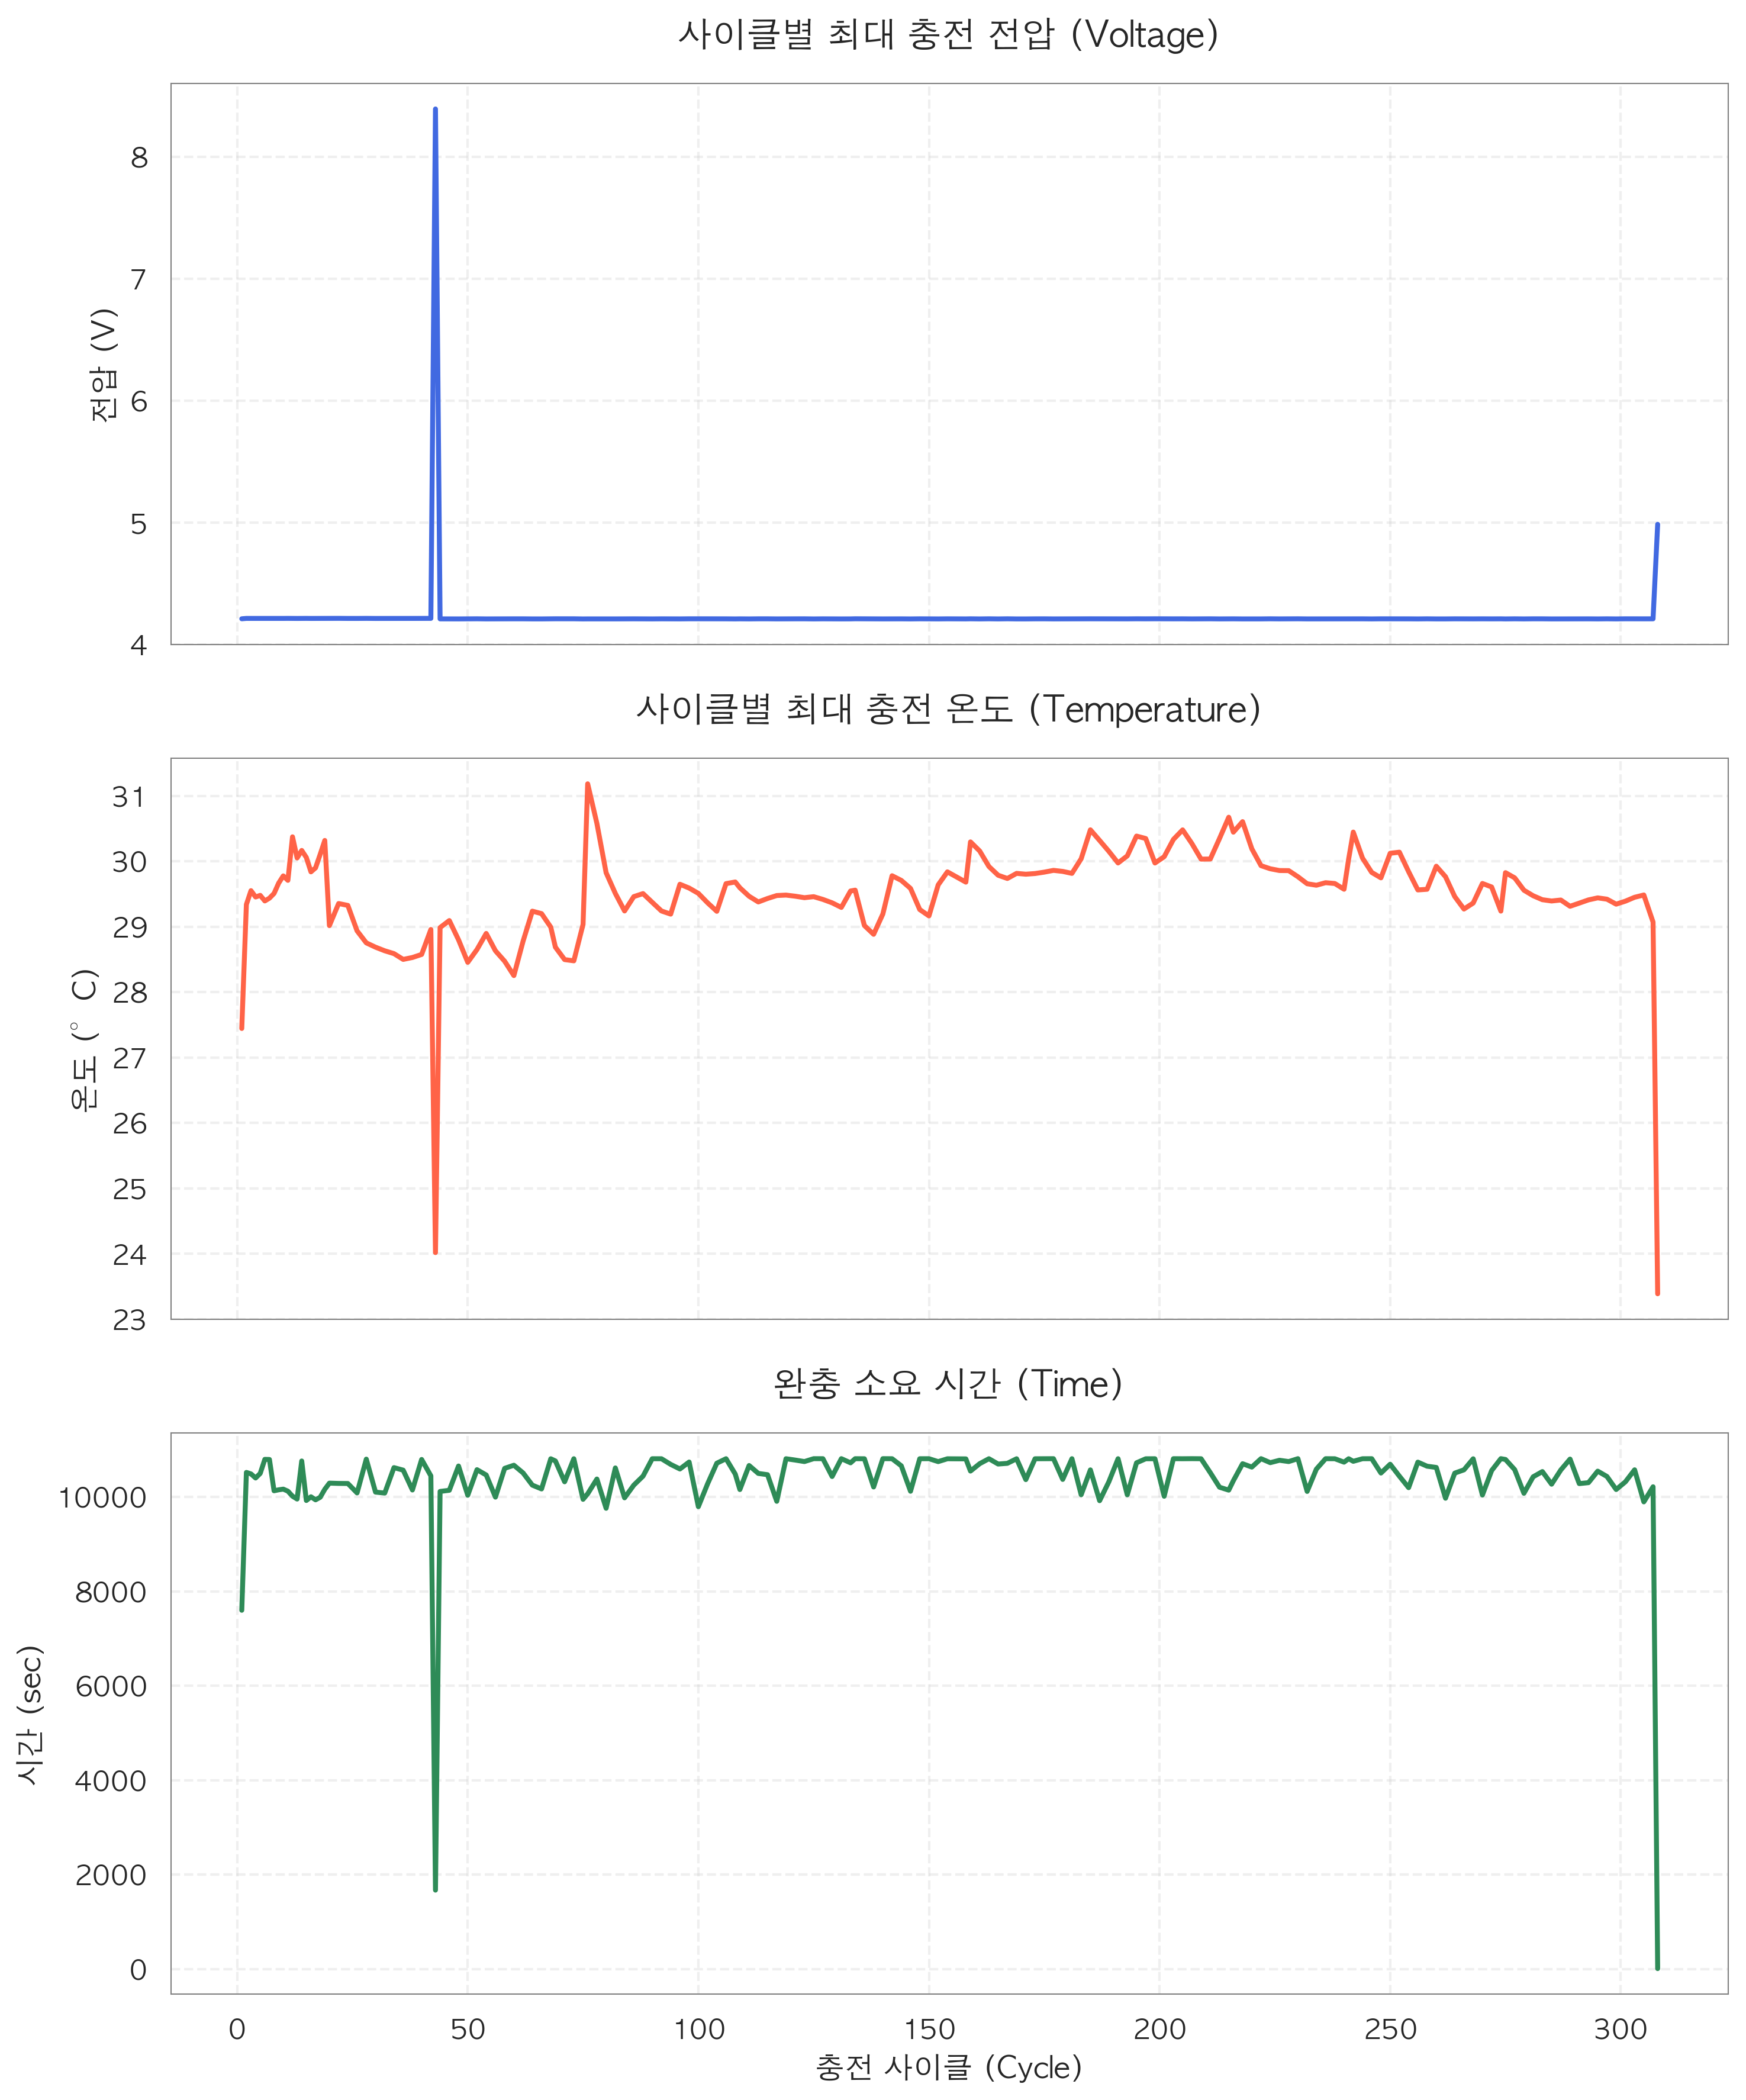

In [204]:
sns.set_theme(style="white", font=plt.rcParams['font.family'])
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
grid_style = {'visible': True, 'linestyle': '--', 'alpha': 0.3}

# 최대 전압
sns.lineplot(
    data=charge_summary, x='real_cycle', y='ch_volt_max',
    ax=axes[0], color='royalblue', linewidth=2
)
axes[0].set_title('사이클별 최대 충전 전압 (Voltage)', fontsize=14, fontweight='bold', pad=15)
axes[0].set_ylabel('전압 (V)')
axes[0].grid(**grid_style)

# 최대 온도
sns.lineplot(
    data=charge_summary, x='real_cycle', y='ch_temp_max',
    ax=axes[1], color='tomato', linewidth=2
)
axes[1].set_title('사이클별 최대 충전 온도 (Temperature)', fontsize=14, fontweight='bold', pad=15)
axes[1].set_ylabel('온도 (°C)')
axes[1].grid(**grid_style)

# 충전 시간
sns.lineplot(
    data=charge_summary, x='real_cycle', y='ch_time',
    ax=axes[2], color='seagreen', linewidth=2
)
axes[2].set_title('완충 소요 시간 (Time)', fontsize=14, fontweight='bold', pad=15)
axes[2].set_ylabel('시간 (sec)')
axes[2].set_xlabel('충전 사이클 (Cycle)', fontsize=12)
axes[2].grid(**grid_style)

for ax in axes:
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)
        spine.set_color('gray')

plt.tight_layout()
plt.show()

charge - discharge 사이클별로 합친 후, 실제 charge - discharge로 이어진 사이클이 진행됨에 따라 전압, 온도, 완충되는데 소요되는 시간이 어떻게 변화하는지 보여주는 데이터

(1) 사이클별 최대 충전 전압

- 약 45번째 사이클 부근에서 전압이 8V 이상으로 급격히 올라가는 이상 데이터 관찰

- 300 사이클 이후 마지막 부분에서 전압이 5V 근처로 상승하는 모습

(2) 사이클별 최대 충전 온도

- 전압 스파이크가 발생했던 45번째 사이클 부근에서 온도가 24도 수준으로 급락하는 현상

- 300 사이클 이후에도 온도가 급격히 하락

(3) 완충 소요 시간

- 45번째 사이클 부근에서 충전시간이 2000초 미만으로 짧게 기록

- 300 사이클 이후 충전 시간이 0에 가깝게 떨어짐

45번째 사이클 부근

- 현상 : 전압 급상승, 온도 하락, 충전 시간 급감

- 예상 : 계측 장비의 오류 또는 충전기가 비정상적 전압을 감지해 안전 장치 작동 후 충전 조기 차단 가능성 있음

### Discharge

In [205]:
discharge

,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time,Capacity,cycle_idx,type,ambient_temperature,start_time_raw,real_cycle
0,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1.856487,2,discharge,24.0,[2.0080e+03 4.0000e+00 2.0000e+00 1.5000e+01 2...,1
1,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1.856487,2,discharge,24.0,[2.0080e+03 4.0000e+00 2.0000e+00 1.5000e+01 2...,1
2,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1.856487,2,discharge,24.0,[2.0080e+03 4.0000e+00 2.0000e+00 1.5000e+01 2...,1
3,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1.856487,2,discharge,24.0,[2.0080e+03 4.0000e+00 2.0000e+00 1.5000e+01 2...,1
4,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,1.856487,2,discharge,24.0,[2.0080e+03 4.0000e+00 2.0000e+00 1.5000e+01 2...,1
...,...,...,...,...,...,...,...,...,...,...,...,...
50280,3.579262,-0.001569,34.864823,0.0006,0.000,2781.312,1.325079,614,discharge,24.0,[2008. 5. 27. 20. 45. ...,307
50281,3.581964,-0.003067,34.814770,0.0006,0.000,2791.062,1.325079,614,discharge,24.0,[2008. 5. 27. 20. 45. ...,307
50282,3.584484,-0.003079,34.676258,0.0006,0.000,2800.828,1.325079,614,discharge,24.0,[2008. 5. 27. 20. 45. ...,307
50283,3.587336,0.001219,34.565580,0.0006,0.000,2810.640,1.325079,614,discharge,24.0,[2008. 5. 27. 20. 45. ...,307


In [206]:
print("[Discharge 데이터]")
discharge.info()
print("\n결측치 개수:")
print(discharge.isna().sum())

[Discharge 데이터]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50285 entries, 0 to 50284
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Voltage_measured      50285 non-null  float64
 1   Current_measured      50285 non-null  float64
 2   Temperature_measured  50285 non-null  float64
 3   Current_load          50285 non-null  float64
 4   Voltage_load          50285 non-null  float64
 5   Time                  50285 non-null  float64
 6   Capacity              50285 non-null  float64
 7   cycle_idx             50285 non-null  int64  
 8   type                  50285 non-null  object 
 9   ambient_temperature   50285 non-null  float64
 10  start_time_raw        50285 non-null  object 
 11  real_cycle            50285 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 4.6+ MB

결측치 개수:
Voltage_measured        0
Current_measured        0
Temperature_measured    0
Current_load

In [207]:
# discharge 기초통계
## 전체 통계
print("\n [Discharge 데이터 전체 통계]")
discharge[[
    "Voltage_measured",
    "Current_measured",
    "Temperature_measured",
    "Current_load",
    "Voltage_load",
    "Time",
    "Capacity"
]].describe()



 [Discharge 데이터 전체 통계]


,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time,Capacity
count,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000
mean,3.515268,-1.806032,32.816991,1.362700,2.308406,1546.208924,1.560345
std,0.231778,0.610502,3.987515,1.313698,0.800300,906.640295,0.182380
min,2.455679,-2.029098,23.214802,-1.998400,0.000000,0.000000,1.287453
25%,3.399384,-2.013415,30.019392,1.998000,2.388000,768.563000,1.386229
50%,3.511664,-2.012312,32.828944,1.998200,2.533000,1537.031000,1.538237
75%,3.660903,-2.011052,35.920887,1.998200,2.690000,2305.984000,1.746871
max,4.222920,0.007496,41.450232,1.998400,4.238000,3690.234000,1.856487


(1) 전류는 거의 -2A 일정한 Constant Current 방전(CC discharge) 방식

- Current_measured min 값이 -2.02A 근처

- 25%, 50%, 75% 값이 거의 동일

→ 즉, 변동 없는 일정 전류로 테스트함 → 데이터 신뢰도 높음

(2) 전압은 cycle 진행에 따라 감소하는 걸로 추정 → 정상적인 방전 특성

- 최고값 4.22V → 최소 2.45V

→ 이 2.45V 근처가 cut-off 방전 전압 역할 (용량 측정 기준 전압이 명확)

(3) 온도는 평균 32℃, 최대 41℃까지 상승

→ 방전 과정에서 발열이 존재

→ 열화 후반부 cycle일수록 온도 상승 속도가 증가할 가능성 (열화센서 feature로 활용 가능)

(4) Capacity의 분포는 열화 힌트 제공

초기 용량 1.85Ah → 후반에는 1.28Ah 수준까지 감소하는 capacity fade(열화)가 확인

(5) Time, Capacity : 비례 관계

Capacity (Ah) = Current (A) × Time (hours)

current는 -2A 정도로 거의 일정

-> capacity는 time에 거의 비례

=> discharge duration은 capacity의 간접지표로 활용 가능

In [208]:
## cycle 2 통계
print("\n [cycle 2 통계]")
discharge[discharge['cycle_idx'] == 2][[
    "Voltage_measured",
    "Current_measured",
    "Temperature_measured",
    "Current_load",
    "Voltage_load",
    "Time",
    "Capacity"
]].describe()


 [cycle 2 통계]


,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time,Capacity
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,1.970000e+02
mean,3.529829,-1.818702,32.572328,-1.805570,2.404944,1812.087497,1.856487e+00
std,0.236558,0.595058,3.495804,0.591217,0.796974,1069.272600,2.448714e-15
min,2.612467,-2.018015,24.325993,-1.998400,0.000000,0.000000,1.856487e+00
25%,3.418746,-2.013447,30.422589,-1.998200,2.498000,891.812000,1.856487e+00
50%,3.529903,-2.012427,32.865786,-1.998200,2.610000,1796.328000,1.856487e+00
75%,3.685214,-2.011144,35.095568,-1.998200,2.765000,2724.203000,1.856487e+00
max,4.191492,0.000729,38.982181,-0.000400,4.206000,3690.234000,1.856487e+00


(1) 전류는 일정 → 실험 조건이 매우 안정적

- Current_measured 25%, 50%, 75% 값이 거의 동일 (-2.01A 근처)

- 이는 Constant Current Discharge(CCD) 실험이 성공적으로 수행되었다는 의미

→ 즉, 변화는 전류 때문이 아니라 배터리 상태 변화 때문이라고 해석 가능

(2) Voltage_measured min = 2.612V → 이 cycle의 cut-off 전압

(3) Temperature가 24℃ → 39℃까지 증가

(4) Capacity가 고정된 하나의 값

“이 cycle에서 배터리가 제공한 총 사용 가능한 에너지” = cycle health score

(5) Time ≈ 1,812초 평균 / 3,690초 max

이 사이클의 방전 지속 시간은 대략 30분 ~ 1시간 사이

In [209]:
# discharge_cycle 단위로 요약
cycle_stats = (
    discharge
    .groupby("cycle_idx")
    .agg(
        capacity_max=("Capacity", "max"),          # 사이클별 최대 용량
        temp_mean=("Temperature_measured", "mean"),
        temp_max=("Temperature_measured", "max"),
        volt_mean=("Voltage_measured", "mean"),
        volt_min=("Voltage_measured", "min"),
        current_mean=("Current_measured", "mean"),
        duration=("Time", "max"),
        n_samples=("Time", "size")
    )
    .reset_index()
)

cycle_stats

,cycle_idx,capacity_max,temp_mean,temp_max,volt_mean,volt_min,current_mean,duration,n_samples
0,2,1.856487,32.572328,38.982181,3.529829,2.612467,-1.818702,3690.234,197
1,4,1.846327,32.725235,39.033398,3.537320,2.587209,-1.817560,3672.344,196
2,6,1.835349,32.642862,38.818797,3.543737,2.651917,-1.816487,3651.641,195
3,8,1.835263,32.514876,38.762305,3.543666,2.592948,-1.825589,3631.563,194
4,10,1.834646,32.382349,38.665393,3.542343,2.547420,-1.826114,3629.172,194
...,...,...,...,...,...,...,...,...,...
163,600,1.293464,33.275688,40.983663,3.466462,2.668737,-1.674488,2793.390,297
164,604,1.288003,33.320678,40.982342,3.468509,2.696396,-1.667447,2793.390,297
165,608,1.287453,33.373150,41.063751,3.466806,2.679483,-1.667470,2792.485,297
166,612,1.309015,33.713519,41.047030,3.471071,2.678714,-1.688898,2802.016,298


In [210]:
print("\n[방전 사이클 요약 describe]")
cycle_stats.describe()


[방전 사이클 요약 describe]


,cycle_idx,capacity_max,temp_mean,temp_max,volt_mean,volt_min,current_mean,duration,n_samples
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,294.000000,1.572502,32.791319,39.845110,3.516787,2.648939,-1.807073,3129.523887,299.315476
std,184.947314,0.190413,0.713631,1.118020,0.032727,0.049297,0.084677,246.654499,56.074922
min,2.000000,1.287453,31.329996,37.801336,3.464021,2.455679,-1.938881,2792.485000,179.000000
25%,133.000000,1.390021,32.282375,38.804674,3.486639,2.636105,-1.883128,2901.343750,300.000000
50%,292.000000,1.557085,32.856923,40.080753,3.514629,2.660192,-1.816639,3086.078000,314.500000
75%,454.000000,1.769163,33.356184,40.865238,3.551061,2.682589,-1.727548,3323.230750,335.250000
max,614.000000,1.856487,34.310885,41.450232,3.564103,2.699983,-1.667447,3690.234000,371.000000


(1) cycle_idx: 2,4,6,…,614 (짝수) → charge와 짝을 이루는 방전 사이클

(2) 

    - cycle 2: 1.856 Ah

    - cycle 608: 1.287 Ah

    -> cycle이 진행될수록 capacity가 거의 단조 감소하는 “열화 커브”를 형성

(3) 지속시간(duration)

    - 초기에는 대략 3600~3700s

    - 후기로 갈수록 2800s 근처까지 감소

    -> 같은 cut-off 전압까지 가는데 걸리는 시간이 줄어듦 = 저장된 에너지가 줄어듦

In [211]:
# Discharge 데이터 real_cycle별로 요약
discharge_summary = discharge.groupby('real_cycle').agg({
    'Capacity': 'max',                # 용량 (한 사이클 내에서는 값이 같음)
    'Voltage_measured': 'min',        # 방전 끝날 때 전압 (얼마나 낮게까지 방전됐나 = 방전 심도)
    'Temperature_measured': 'max',    # 방전 중 최대 온도
    'Time': 'max'                     # 방전 지속 시간 (capacity와 직결)
}).rename(columns={
    'Capacity': 'capacity',
    'Voltage_measured': 'dis_volt_min',
    'Temperature_measured': 'dis_temp_max',
    'Time': 'dis_time'
})

discharge_summary

,capacity,dis_volt_min,dis_temp_max,dis_time
real_cycle,,,,
1,1.856487,2.612467,38.982181,3690.234
2,1.846327,2.587209,39.033398,3672.344
3,1.835349,2.651917,38.818797,3651.641
4,1.835263,2.592948,38.762305,3631.563
5,1.834646,2.547420,38.665393,3629.172
...,...,...,...,...
300,1.293464,2.668737,40.983663,2793.390
302,1.288003,2.696396,40.982342,2793.390
304,1.287453,2.679483,41.063751,2792.485


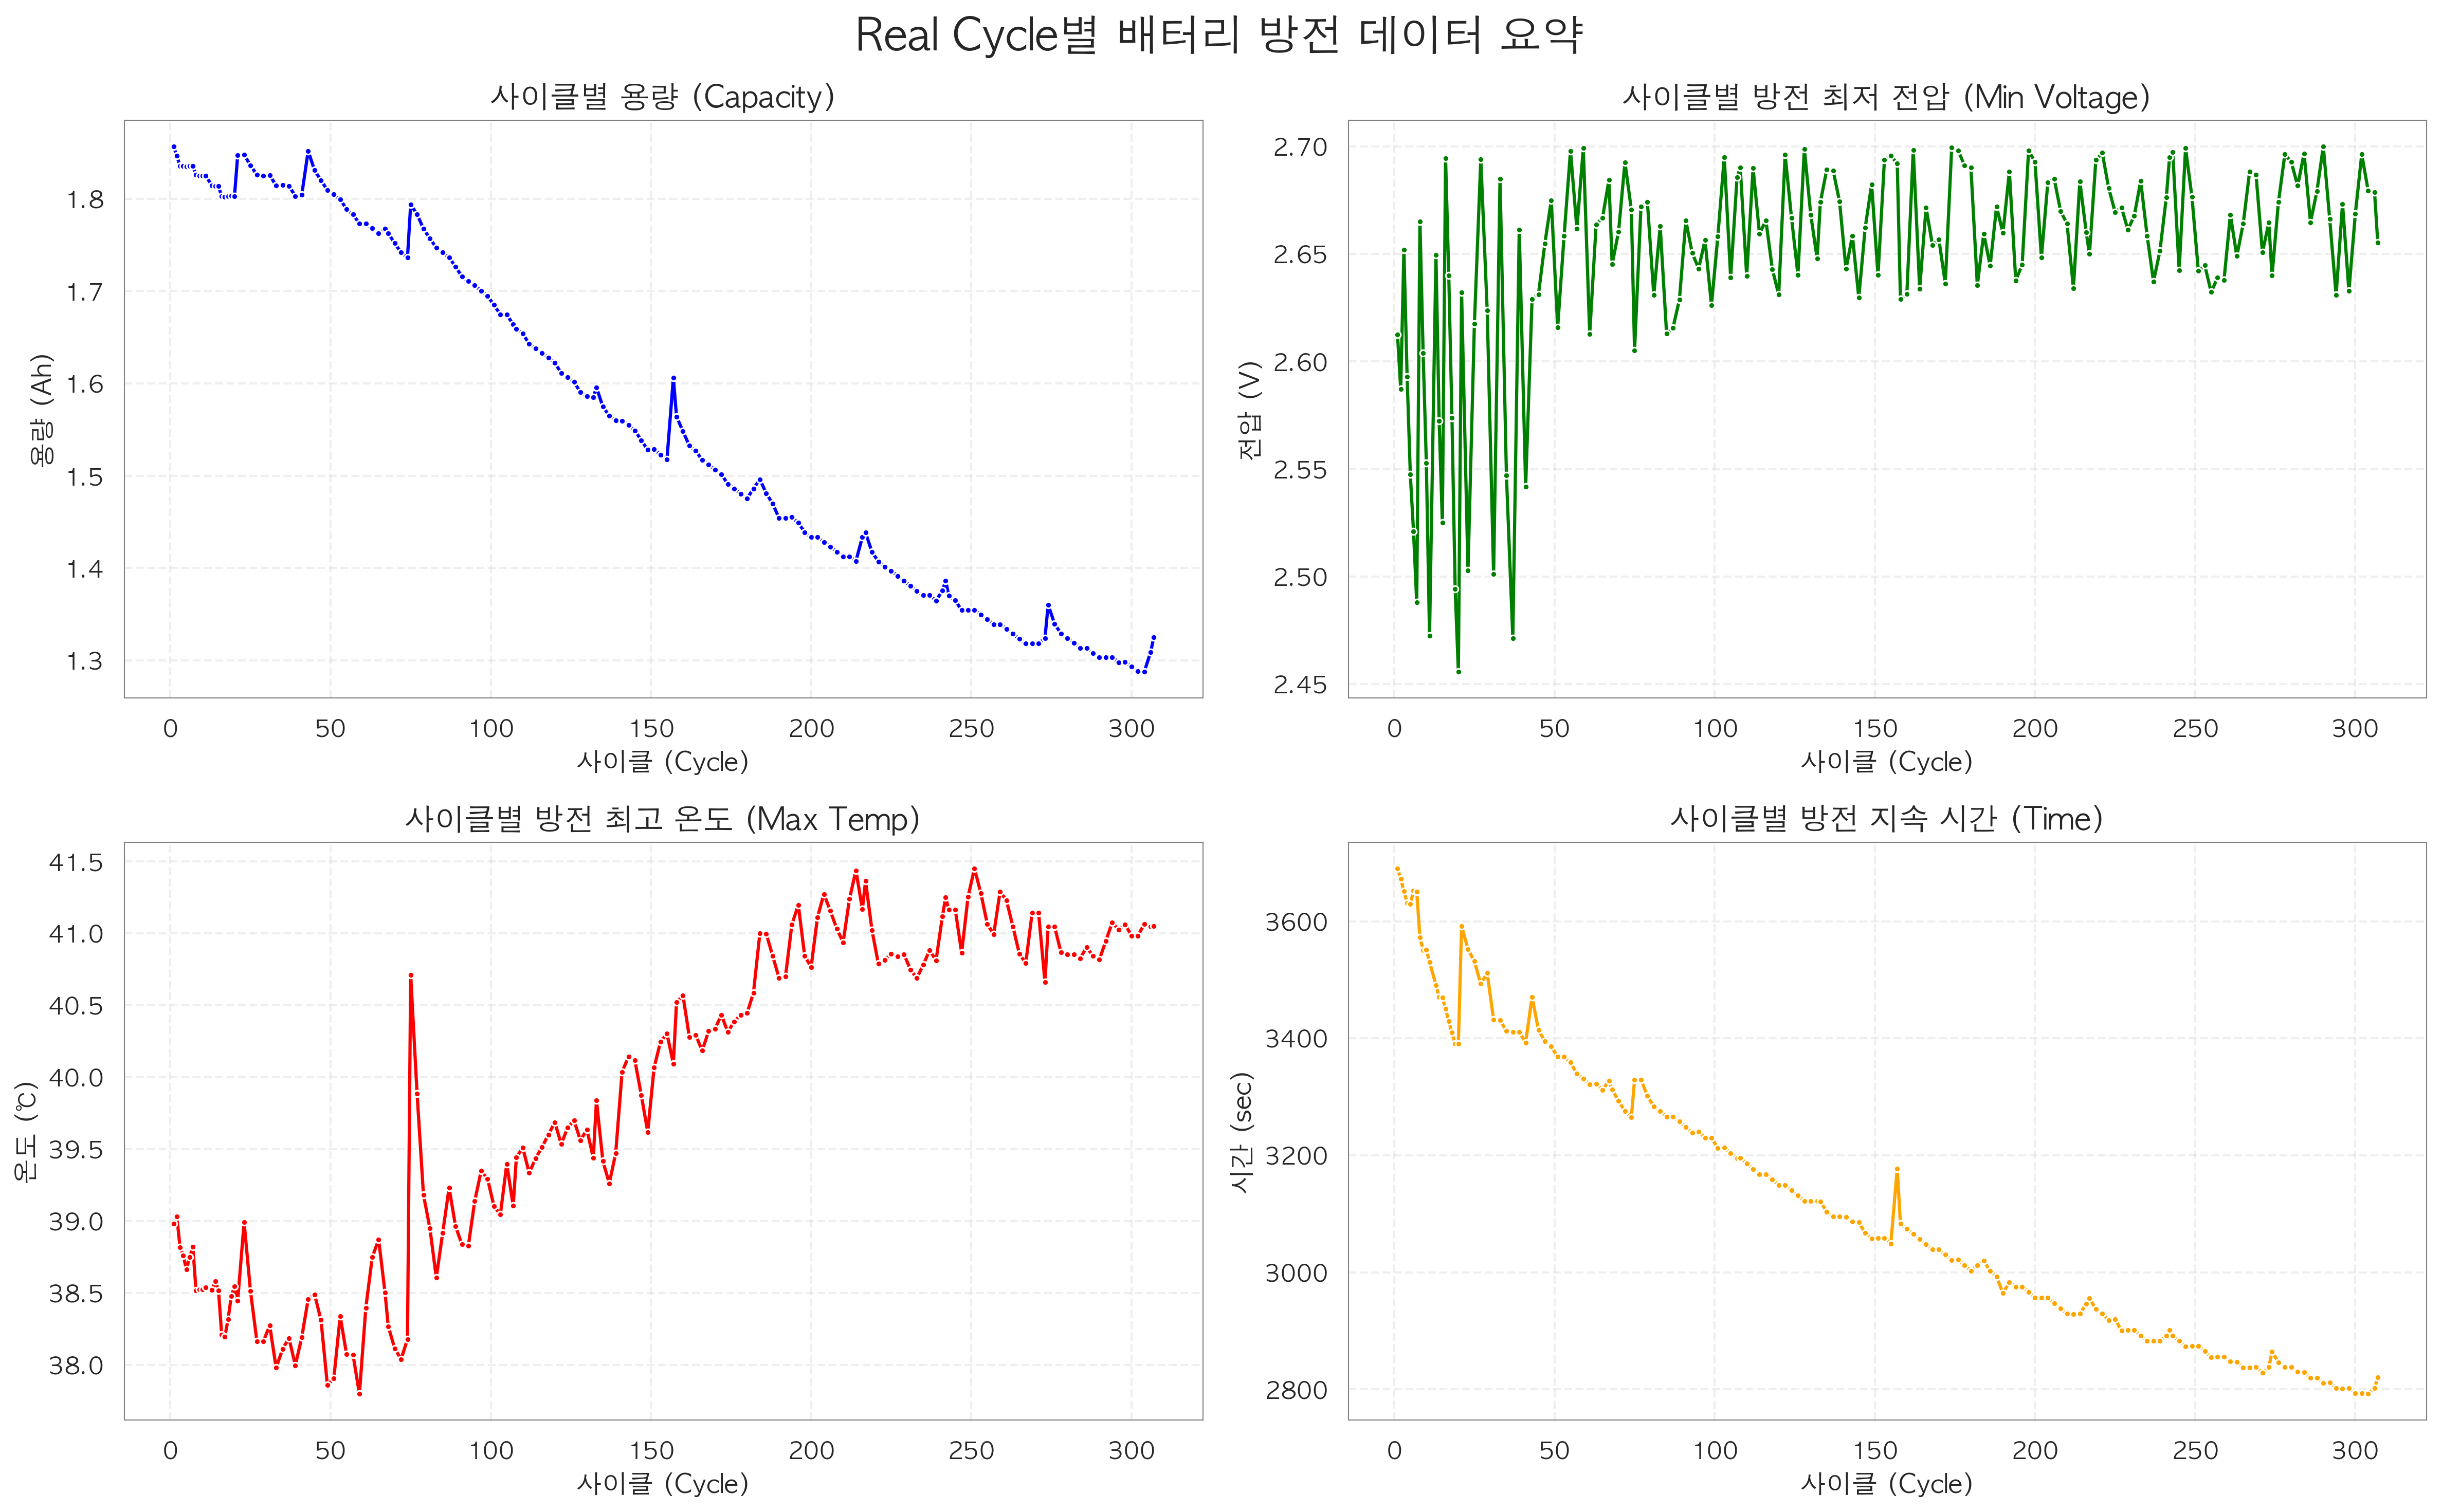

In [212]:
sns.set_theme(style="white", font=plt.rcParams['font.family'])
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Real Cycle별 배터리 방전 데이터 요약', fontsize=20)
grid_style = {'visible': True, 'linestyle': '--', 'alpha': 0.3}

# 용량 (Capacity)
sns.lineplot(ax=axes[0, 0], data=discharge_summary, x='real_cycle', y='capacity', color='blue', marker='.')
axes[0, 0].set_title('사이클별 용량 (Capacity)', fontsize=14)
axes[0, 0].set_xlabel('사이클 (Cycle)', fontsize=12)
axes[0, 0].set_ylabel('용량 (Ah)', fontsize=12)
axes[0, 0].grid(**grid_style)

#  방전 종지 전압 (Min Voltage) - 깊게 방전된 정도
sns.lineplot(ax=axes[0, 1], data=discharge_summary, x='real_cycle', y='dis_volt_min', color='green', marker='.')
axes[0, 1].set_title('사이클별 방전 최저 전압 (Min Voltage)', fontsize=14)
axes[0, 1].set_xlabel('사이클 (Cycle)', fontsize=12)
axes[0, 1].set_ylabel('전압 (V)', fontsize=12)
axes[0, 1].grid(**grid_style)

# 방전 중 최고 온도 (Max Temperature)
sns.lineplot(ax=axes[1, 0], data=discharge_summary, x='real_cycle', y='dis_temp_max', color='red', marker='.')
axes[1, 0].set_title('사이클별 방전 최고 온도 (Max Temp)', fontsize=14)
axes[1, 0].set_xlabel('사이클 (Cycle)', fontsize=12)
axes[1, 0].set_ylabel('온도 (℃)', fontsize=12)
axes[1, 0].grid(**grid_style)

# 방전 시간 (Discharge Time)
sns.lineplot(ax=axes[1, 1], data=discharge_summary, x='real_cycle', y='dis_time', color='orange', marker='.')
axes[1, 1].set_title('사이클별 방전 지속 시간 (Time)', fontsize=14)
axes[1, 1].set_xlabel('사이클 (Cycle)', fontsize=12)
axes[1, 1].set_ylabel('시간 (sec)', fontsize=12)
axes[1, 1].grid(**grid_style)

for ax in axes.flatten():
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)
        spine.set_color('gray')

plt.tight_layout()
plt.show()

(1) 사이클별 용량 (Capacity) & (4) 방전 지속 시간 (Time)

: 사이클이 진행됨(0 → 300)에 따라 용량과 방전 시간이 **우하향**하고 있음

초기 용량 약 1.85 Ah에서 300사이클 후 약 1.3 Ah까지 떨어짐 (약 30% 감소)

중간에(약 150 사이클 부근) 값이 튀는 구간이 있지만, 전체적인 추세는 성능 저하

-> 배터리 수명(SOH, State of Health)이 꾸준히 줄어들고 있으며, 이 배터리는 300 사이클 시점에서 교체 시기가 가까워졌거나 이미 지났을 가능성이 큼

(보통 초기 용량의 80% 밑으로 떨어지면 수명 종료로 본다)

(2) 사이클별 방전 최저 전압 (Min Voltage)

: 초기 (0~50 사이클) - 그래프가 매우 심하게 요동침 (2.45V까지 깊게 떨어졌다가 2.7V로 회복하는 등 불안정)

중/후기 - 약 2.65V ~ 2.7V 사이에서 비교적 안정적인 진폭을 보이지만, 여전히 미세하게 흔들림

인사이트:

초반부의 심한 변동은 배터리 활성화(Formation) 과정이거나, 초기 불안정한 화학 상태, 혹은 실험 초기의 세팅 문제일 수 있음

but, 전반적으로 방전 종지 전압(Cut-off Voltage) 근처에서 방전이 멈추고 있음을 보임

(3) 사이클별 방전 최고 온도 (Max Temp)

: 우상향 추세가 뚜렷

초기에는 38~39℃ 수준이었으나, 사이클이 반복될수록 온도가 올라가 300 사이클 즈음에는 41℃ 이상을 기록

-> 배터리가 노화됨에 따라 열이 더 많이 발생하고 있음 (배터리 효율이 떨어지고 있음)

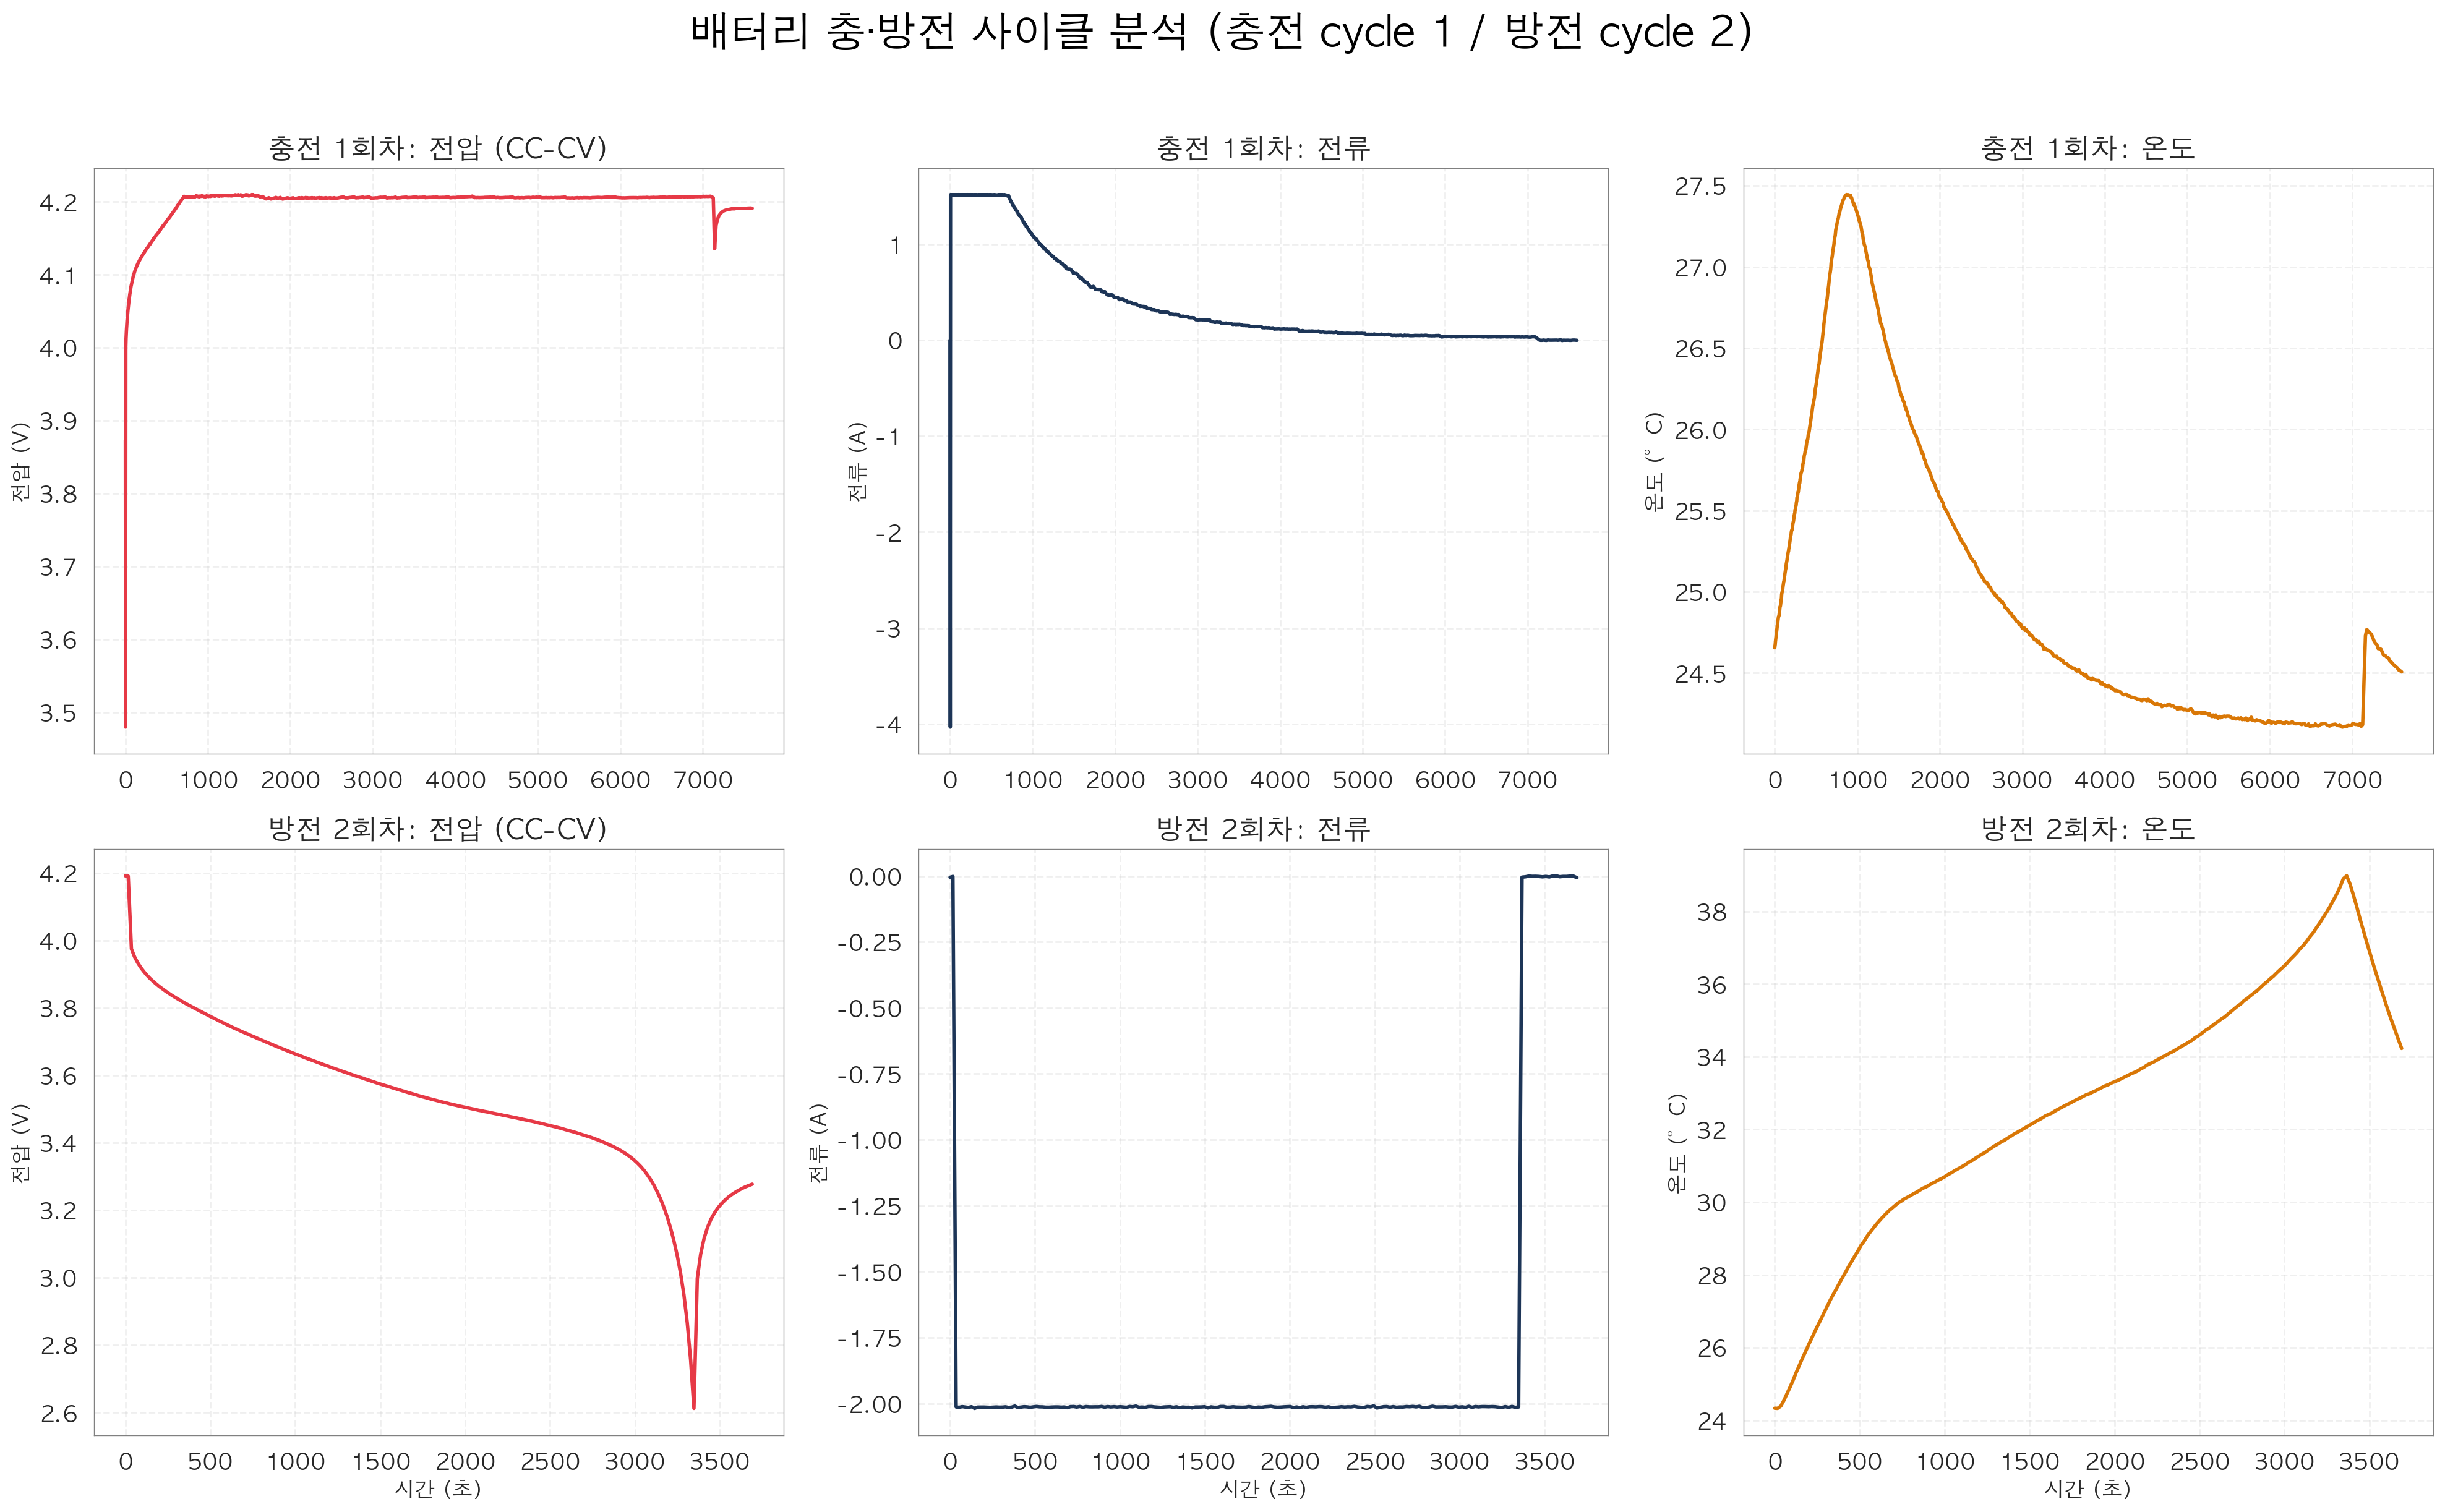

In [221]:
def plot_cycle(charge, discharge, charge_cycle, discharge_cycle):
    ch = charge[charge['cycle_idx'] == charge_cycle]
    dch = discharge[discharge['cycle_idx'] == discharge_cycle]

    sns.set_style("white")
    sns.set_context("notebook", font_scale=1.2)

    # 맥 세팅
    plt.rcParams['font.family'] = 'AppleGothic'
    plt.rcParams['axes.unicode_minus'] = False
    
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))

    fig.suptitle(f'배터리 충·방전 사이클 분석 (충전 cycle {charge_cycle} / 방전 cycle {discharge_cycle})', 
                 fontsize=24, fontweight='extra bold', color = 'black', y=1.02)
    
    col_vol = '#E63946'
    col_cur = '#1D3557'
    col_temp = '#D97706'

    # === 충전 (Charge) 그래프 ===
    # 전압 (Voltage)
    axes[0, 0].plot(ch['Time'], ch['Voltage_measured'], color=col_vol, linewidth=2)
    axes[0, 0].set_title(f'충전 {charge_cycle}회차: 전압 (CC-CV)', fontsize=16, fontweight='extra bold')
    axes[0, 0].set_ylabel('전압 (V)', fontsize=12, fontweight='bold')
    axes[0, 0].grid(True, linestyle='--', alpha=0.3)
    
    # 전류 (Current)
    axes[0, 1].plot(ch['Time'], ch['Current_measured'], color=col_cur, linewidth=2)
    axes[0, 1].set_title(f'충전 {charge_cycle}회차: 전류', fontsize=16, fontweight='extra bold')
    axes[0, 1].set_ylabel('전류 (A)', fontsize=12)
    axes[0, 1].grid(True, linestyle='--', alpha=0.3)
    
    # 온도 (Temperature)
    axes[0, 2].plot(ch['Time'], ch['Temperature_measured'], color=col_temp, linewidth=2)
    axes[0, 2].set_title(f'충전 {charge_cycle}회차: 온도', fontsize=16, fontweight='extra bold')
    axes[0, 2].set_ylabel('온도 (°C)', fontsize=12)
    axes[0, 2].grid(True, linestyle='--', alpha=0.3)

    # === 방전 (Discharge) 그래프 ===
    # 전압 (Voltage)
    axes[1, 0].plot(dch['Time'], dch['Voltage_measured'], color=col_vol, linewidth=2)
    axes[1, 0].set_title(f'방전 {discharge_cycle}회차: 전압 (CC-CV)', fontsize=16, fontweight='extra bold')
    axes[1, 0].set_ylabel('전압 (V)', fontsize=12)
    axes[1, 0].set_xlabel('시간 (초)', fontsize=12)
    axes[1, 0].grid(True, linestyle='--', alpha=0.3)

    # 전류 (Current)
    axes[1, 1].plot(dch['Time'], dch['Current_measured'], color=col_cur, linewidth=2)
    axes[1, 1].set_title(f'방전 {discharge_cycle}회차: 전류', fontsize=16, fontweight='extra bold')
    axes[1, 1].set_ylabel('전류 (A)', fontsize=12)
    axes[1, 1].set_xlabel('시간 (초)', fontsize=12)
    axes[1, 1].grid(True, linestyle='--', alpha=0.3)
    # 6. 온도 (Temperature)
    axes[1, 2].plot(dch['Time'], dch['Temperature_measured'], color=col_temp, linewidth=2)
    axes[1, 2].set_title(f'방전 {discharge_cycle}회차: 온도', fontsize=16, fontweight='extra bold')
    axes[1, 2].set_ylabel('온도 (°C)', fontsize=12)
    axes[1, 2].set_xlabel('시간 (초)', fontsize=12)
    axes[1, 2].grid(True, linestyle='--', alpha=0.3)

    for ax in axes.flatten():
        for spine in ax.spines.values():
            spine.set_linewidth(0.5)
            spine.set_color('gray')
    plt.tight_layout()
    plt.show()



# 함수 실행 (충전 1, 방전 2)
plot_cycle(charge, discharge, 1, 2)


(1) Charge

- 전압 그래프(빨강) : 쭉 오르다가 4.2V쯤에서 멈추고 옆으로 쭉

- 전류 그래프(파랑) : 잠깐 일정하다가 뚝 떨어짐

    -> CC-CV 충전방식

=> 배터리가 열화되면(노화되면) 4.2V에 도달하는 시간이 점점 빨라짐(capacity가 작아져서 금방 차게 되기 때문)

(2) Discharge

- 전압 그래프 : 4.2V에서 시작해서 서서히 떨어지다가 막판에 급격히 떨어짐

- 온도 그래프 : 방전되는 내내 올라감. (배터리가 노화되면 impedance가 커져서 온도가 더 많이 올라감)

### Impedance

In [214]:
imp

,Sense_current,Battery_current,Current_ratio,Battery_impedance,Rectified_Impedance,Re,Rct,cycle_idx,type,ambient_temperature,start_time_raw,real_cycle
0,(-1+1j),(-1+1j),(1+0j),(-0.43892624830326377-0.107298295835479j),(0.07006937798290404-0.00047998469078178944j),0.044669,0.069456,41,impedance,24.0,[2008. 4. 18. 20. 55. ...,21
1,(820.6094970703125-36.23455047607422j),(337.0914611816406-82.9207763671875j),(2.3204145178633437+0.4633045948164565j),(0.13008840651776496-0.19711481029612374j),(0.06817886114940203-0.001190040925296937j),0.044669,0.069456,41,impedance,24.0,[2008. 4. 18. 20. 55. ...,21
2,(827.2421875-48.23122787475586j),(330.6315612792969-70.01371765136719j),(2.424192647592199+0.36746495469515333j),(0.058770560504133235+0.03330656583655633j),(0.06793257733714593-5.6826811936507056e-05j),0.044669,0.069456,41,impedance,24.0,[2008. 4. 18. 20. 55. ...,21
3,(827.1934814453125-56.195716857910156j),(330.8086242675781-61.73442459106445j),(2.4470021712116985+0.28677775364826635j),(0.0058135116366746726-0.060546548141956195j),(0.06691839226387165-0.0008787264015490232j),0.044669,0.069456,41,impedance,24.0,[2008. 4. 18. 20. 55. ...,21
4,(824.9295043945312-53.241477966308594j),(332.68267822265625-57.62901306152344j),(2.434304977711638+0.2616460702282485j),(0.12608106668700975-0.09044390544679616j),(0.06807105294348659-0.0001974802021297548j),0.044669,0.069456,41,impedance,24.0,[2008. 4. 18. 20. 55. ...,21
...,...,...,...,...,...,...,...,...,...,...,...,...
13339,(915.489013671875-64.04512023925781j),(230.14950561523438+91.9098892211914j),(3.334834919457856-1.6100379067382284j),(0.2450237439418051-0.04983619374573483j),(0.05030061471269835+0.0004471176940299067j),0.050036,0.074792,615,impedance,24.0,[2008. 5. 27. 21. 34. 28.64],308
13340,(916.7255249023438+2.986217498779297j),(212.18885803222656+107.74581146240234j),(3.4403927232922893-1.732898190940107j),(0.26459423551817796-0.055235088103719486j),(0.05030061471269835+0.0004471176940299067j),0.050036,0.074792,615,impedance,24.0,[2008. 5. 27. 21. 34. 28.64],308
13341,(914.61962890625+126.11148071289062j),(176.59803771972656+131.6827850341797j),(3.6706560245778346-2.0229597798418966j),(0.28857059933181783-0.058837097064953735j),(0.05030061471269835+0.0004471176940299067j),0.050036,0.074792,615,impedance,24.0,[2008. 5. 27. 21. 34. 28.64],308
13342,(880.3408203125+293.8252868652344j),(136.84762573242188+146.8810272216797j),(4.060163697383427-2.2107488242884408j),(0.3176999700278338-0.05912720702491042j),(0.05030061471269835+0.0004471176940299067j),0.050036,0.074792,615,impedance,24.0,[2008. 5. 27. 21. 34. 28.64],308


In [234]:
print("\n[Impedance 데이터]")
imp.info()

print("\n결측치 개수:")
print(imp.isna().sum())


[Impedance 데이터]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13344 entries, 0 to 13343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sense_current        13344 non-null  object 
 1   Battery_current      13344 non-null  object 
 2   Current_ratio        13344 non-null  object 
 3   Battery_impedance    13344 non-null  object 
 4   Rectified_Impedance  13344 non-null  object 
 5   Re                   13344 non-null  float64
 6   Rct                  13344 non-null  float64
 7   cycle_idx            13344 non-null  int64  
 8   type                 13344 non-null  object 
 9   ambient_temperature  13344 non-null  float64
 10  start_time_raw       13344 non-null  object 
 11  real_cycle           13344 non-null  int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 1.2+ MB

결측치 개수:
Sense_current          0
Battery_current        0
Current_ratio          0
Battery_impedance      0
Rec

In [216]:
# imp_cycle 단위로 요약

imp_cycle_stats = (
    imp
    .groupby("cycle_idx")
    .agg(
        Re_mean=("Re","mean"),
        Re_min=("Re","min"),
        Re_max=("Re","max"),
        Rct_mean=("Rct","mean"),
        Rct_min=("Rct","min"),
        Rct_max=("Rct","max"),
        imp_samples=("Re","size")
    )
    .reset_index()
)

imp_cycle_stats

,cycle_idx,Re_mean,Re_min,Re_max,Rct_mean,Rct_min,Rct_max,imp_samples
0,41,0.044669,0.044669,0.044669,0.069456,0.069456,0.069456,48
1,43,0.046687,0.046687,0.046687,0.076275,0.076275,0.076275,48
2,45,0.044843,0.044843,0.044843,0.067972,0.067972,0.067972,48
3,47,0.046195,0.046195,0.046195,0.074534,0.074534,0.074534,48
4,49,0.045101,0.045101,0.045101,0.068528,0.068528,0.068528,48
...,...,...,...,...,...,...,...,...
273,605,0.058801,0.058801,0.058801,0.082370,0.082370,0.082370,48
274,607,0.057630,0.057630,0.057630,0.087424,0.087424,0.087424,48
275,609,0.058984,0.058984,0.058984,0.082522,0.082522,0.082522,48
276,611,0.057824,0.057824,0.057824,0.089757,0.089757,0.089757,48


Cycle이 증가할수록 Re와 Rct 값이 전반적으로 증가하는 패턴

-> 시간이 지날수록 배터리 내부저항과 전하 전달 저항이 모두 증가

In [217]:
print("\n[임피던스 사이클 요약 describe]")
imp_cycle_stats.describe()


[임피던스 사이클 요약 describe]


,cycle_idx,Re_mean,Re_min,Re_max,Rct_mean,Rct_min,Rct_max,imp_samples
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.0
mean,327.859712,0.054245,0.054245,0.054245,0.077340,0.077340,0.077340,48.0
std,166.212638,0.005490,0.005490,0.005490,0.006367,0.006367,0.006367,0.0
min,41.000000,0.043559,0.043559,0.043559,0.064883,0.064883,0.064883,48.0
25%,185.500000,0.049161,0.049161,0.049161,0.071511,0.071511,0.071511,48.0
50%,328.000000,0.055850,0.055850,0.055850,0.077487,0.077487,0.077487,48.0
75%,469.500000,0.058815,0.058815,0.058815,0.082563,0.082563,0.082563,48.0
max,615.000000,0.063516,0.063516,0.063516,0.089757,0.089757,0.089757,48.0


- 데이터가 특정 구간에 치우치지 않고 비교적 균형 있게 cycle 전 범위를 커버

    -> Q1(25%) = ~185 cycles / Q3(75%) = ~469 cycles

- Noise가 적고 안정적인 측정값

    - std(표준편차)가 두 임피던스 값 모두 크지 않음

- Re_mean과 Rct_mean 모두 cycle이 증가할수록 값이 상승하는 패턴을 보이기 때문에, 이 데이터는 배터리 열화 progression을 명확히 반영

- Rct_mean의 분포 폭이 Re_mean보다 조금 더 큼 → 전극 반응 degradation이 더 민감하게 변화

In [218]:
# Impedance 데이터 real_cycle별로 요약
impedance_summary = imp.groupby('real_cycle').agg({
    'Re': 'mean',   # 전해질 저항
    'Rct': 'mean'   # 전하 전달 저항
}).rename(columns={'Re': 'imp_Re', 'Rct': 'imp_Rct'})

print("특징 추출 완료. 각 데이터의 크기:")
print("Charge:", charge_summary.shape)
print("Discharge:", discharge_summary.shape)

impedance_summary

특징 추출 완료. 각 데이터의 크기:
Charge: (169, 3)
Discharge: (168, 4)


,imp_Re,imp_Rct
real_cycle,,
21,0.044669,0.069456
22,0.046687,0.076275
23,0.044843,0.067972
24,0.046195,0.074534
25,0.045101,0.068528
...,...,...
303,0.058801,0.082370
304,0.057630,0.087424
305,0.058984,0.082522


<>:17: SyntaxWarning: invalid escape sequence '\O'
<>:28: SyntaxWarning: invalid escape sequence '\O'
<>:17: SyntaxWarning: invalid escape sequence '\O'
<>:28: SyntaxWarning: invalid escape sequence '\O'
/var/folders/_s/9n_b3jmd4b795qc13tyx1l500000gn/T/ipykernel_83633/2408552520.py:17: SyntaxWarning: invalid escape sequence '\O'
  ax1.set_ylabel('전해질 저항 (Re) [$\Omega$]', color=color_re, fontsize=12, fontweight='bold')
/var/folders/_s/9n_b3jmd4b795qc13tyx1l500000gn/T/ipykernel_83633/2408552520.py:28: SyntaxWarning: invalid escape sequence '\O'
  ax2.set_ylabel('전하 전달 저항 (Rct) [$\Omega$]', color=color_rct, fontsize=12, fontweight='bold')


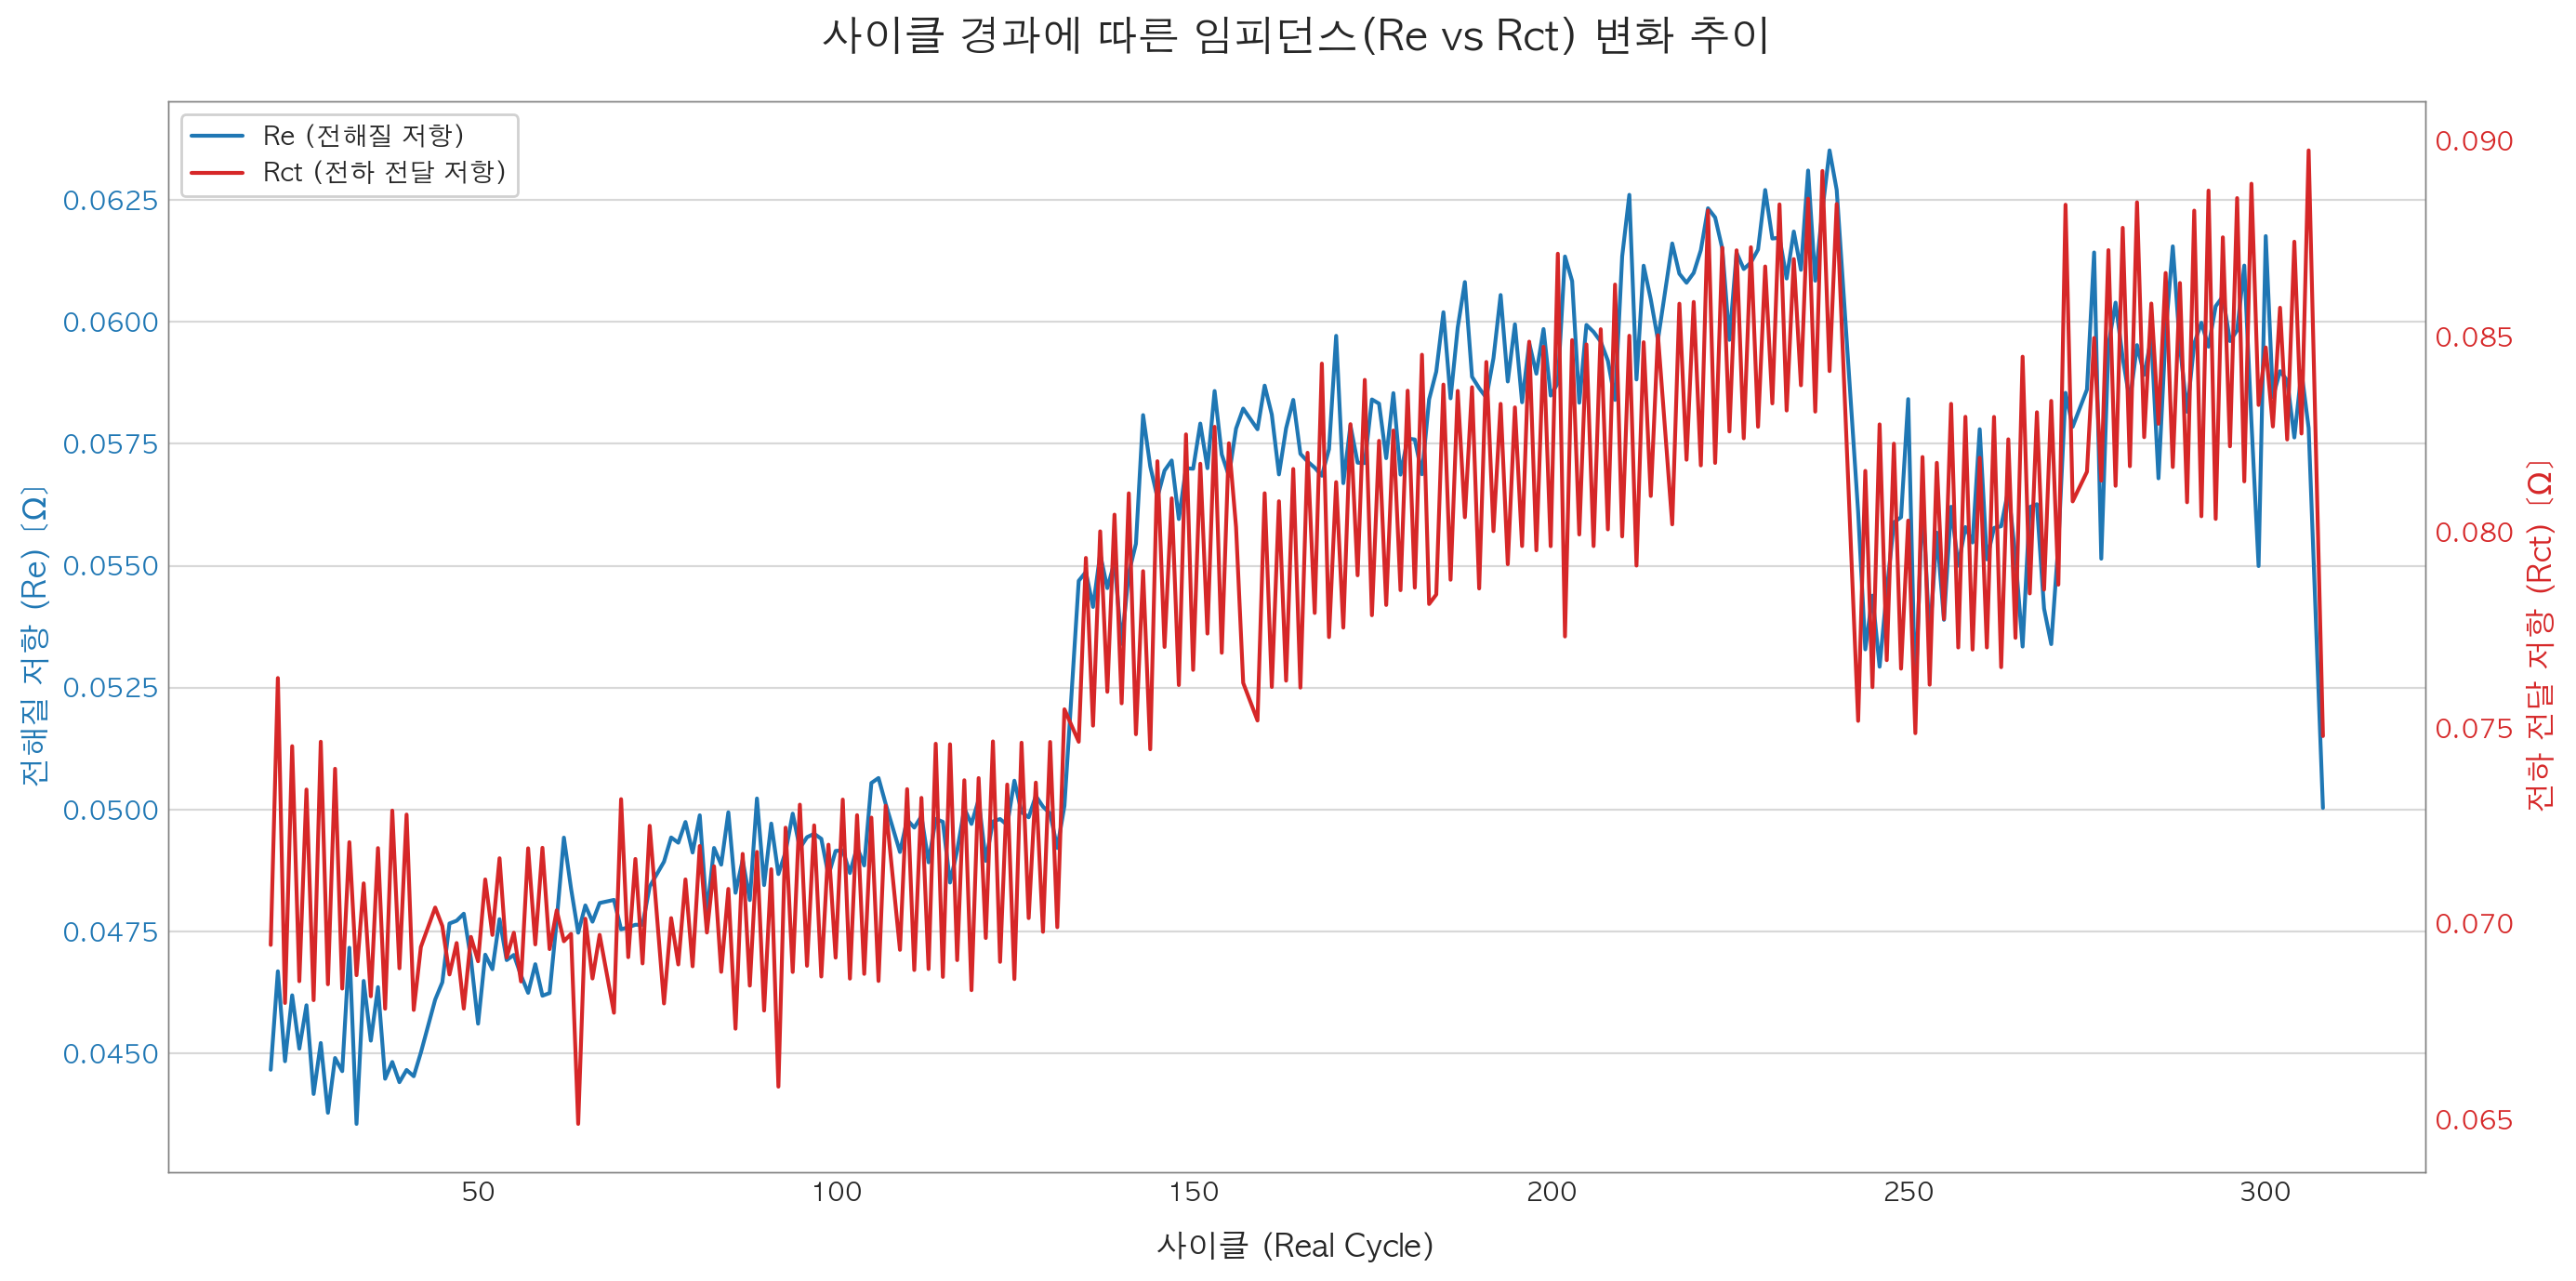

In [233]:
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('seaborn-v0_8-white')

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

fig, ax1 = plt.subplots(figsize=(14, 7))

color_re = '#1f77b4'
color_rct = '#d62728'

# Y축_1: Re (전해질 저항)
ax1.plot(impedance_summary.index, impedance_summary['imp_Re'], 
         color=color_re, linewidth=1.5, label='Re (전해질 저항)', zorder=2)

ax1.set_xlabel('사이클 (Real Cycle)', fontsize=12, fontweight='bold', labelpad=10)
ax1.set_ylabel('전해질 저항 (Re) [$\Omega$]', color=color_re, fontsize=12, fontweight='bold')
ax1.tick_params(axis='y', labelcolor=color_re)

ax1.grid(True, axis='y', color='gray', alpha=0.3, linestyle='-', zorder=1)
ax1.grid(False, axis='x')

# Y축_2: Rct (전하 전달 저항)
ax2 = ax1.twinx()
ax2.plot(impedance_summary.index, impedance_summary['imp_Rct'], 
         color=color_rct, linewidth=1.5, label='Rct (전하 전달 저항)', zorder=2)

ax2.set_ylabel('전하 전달 저항 (Rct) [$\Omega$]', color=color_rct, fontsize=12, fontweight='bold')
ax2.tick_params(axis='y', labelcolor=color_rct)
ax2.grid(False)

# 제목 및 그리드
plt.title('사이클 경과에 따른 임피던스(Re vs Rct) 변화 추이', fontsize=16, fontweight='bold', pad=20)

# 범례 표시 (두 축의 레이블을 합쳐서 표시)
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', frameon=True, framealpha=0.9)

for ax in [ax1, ax2]:
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)
        spine.set_color('gray') 

plt.tight_layout()
plt.show()

(1) 초기 안정 구간 (~130 Cycle)

- $R_e$(청색)와 $R_{ct}$(적색) 모두 비교적 낮은 값에서 안정적으로 유지되거나 아주 완만하게 상승

- 의미: 초기 SEI 층 형성 이후 배터리가 안정적으로 구동되는 시기, 전해질 상태도 양호

(2) 1차 급등 구간 (The Knee Point, ~130 Cycle)

- 130 사이클 부근에서 $R_e$와 $R_{ct}$가 동시에 계단식으로 급격히 상승 ($R_e$: 0.050$\rightarrow$0.055, $R_{ct}$: 0.075$\rightarrow$0.082)

- 이는 일반적인 점진적 화학 열화(Chemical aging) X
 
    **물리적인 손상(Mechanical degradation)**이나 환경 변화일 가능성이 큼
 
(3) 불안정 및 이상 징후 구간 (240 Cycle ~)

- 240 사이클 부근에서 두 저항 값이 갑자기 뚝 떨어졌다가(Drop) 다시 상승

- 배터리 노화는 비가역적(되돌릴 수 없음)이므로, 저항이 갑자기 낮아지는 것은 배터리 자체의 회복이라기보다 외부 요인일 가능성이 높음

    - 가능성 1 (온도): 실험 챔버의 온도가 일시적으로 상승했다면 저항이 낮게 측정됨
    
    - 가능성 2 (휴지기): 긴 시간 동안 방치(Resting) 후 측정했다면, 분극(Polarization)이 해소되어 일시적으로 성능이 회복된 것처럼 보일 수 있음

① $R_{ct}$ (전하 전달 저항)의 높은 변동성 (Noise)

: 빨간색 그래프($R_{ct}$)가 위아래로 심하게 톱니바퀴처럼 요동

    -> 이는 배터리 내부의 전기화학 반응 속도가 매 사이클마다 일정하지 않음을 의미

    하지만, 데이터 처리(Fitting) 과정의 노이즈일 가능성도 배제할 수 X

    $R_{ct}$는 등가회로 모델링을 통해 추출하는데, 이 과정이 불안정할 수 있음 (스무딩(Smoothing) 처리 필요)

② $R_e$와 $R_{ct}$의 강력한 상관관계 (Coupling)

: 파란선과 빨간선이 급등하고 급락하는 타이밍(130, 240 Cycle)이 놀랍도록 일치

    -> 전해질 저항($R_e$)과 전극 계면 저항($R_{ct}$)이 동시에 변한다는 것은, 이 현상의 원인이 "배터리 전체에 영향을 미치는 요인"이라는 뜻

③ 수명 예측의 지표: "130 Cycle이 변곡점이다"

: 130 사이클 이후로 저항 증가 속도가 빨라지고 데이터가 불안정해짐

- 노이즈 제거 필요 : $R_{ct}$의 노이즈가 너무 심해 경향성을 파악하기 어렵

- 130 Cycle 원인 분석 : 배터리 내부의 '급격한 열화(Sudden Death)'가 시작된 시점일 가능성 높음

- 240 Cycle 데이터 검증: 저항이 급락한 구간은 데이터 신뢰도가 떨어지는 구간(Outlier)일 수 있음